![image-2.png](attachment:image-2.png)
_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad grupal: Explorando patrones ocultos: Detección de Anomalías en datos
## Objetivos

Mediante este trabajo se pretende que ponga en práctica la aplicación de las técnicas de detección de anomalías. El objetivo es analizar si existen anomalías en el conjunto de datos aplicando técnicas univariantes y multivariantes. Debe detallar los pasos que hay que realizar para detección de valores inusuales.

- 	Entender los métodos media móvil, z-score, Isolation Forest y Local Outlier Factor
- Implementar el código para cada una de estas técnicas y analizar si existen o no anomalía
- Investigar sobre una técnica de detección de anomalías con un caso de uso concreto.

Descripción de la actividad

Debes realizar la actividad en el Notebook adjunto. Debes ir completando el código solicitado, así como responder a las preguntas que se van realizando.

Tareas que realizar:
- Detección de anomalías.
- Debes completar el código pedido en este notebook y contestar las preguntas finales.
- Buscar dos artículos científicos (https://scholar.google.es/) con un caso de uso de detección de anomalías. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

Para cada artículo indicar:
- Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la detección anomalías.
- Técnicas de detección de anomalías empleadas.
- Principales resultados de la aplicación y de la investigación.


#### Integrantes del grupo

Marcos Caballero Cortés, Ismael García Mayorga y Roger Juvé Valles

## Detección de anomalías

Los transformadores juegan un papel muy importante en el sistema eléctrico. Aunque son algunos de los componentes más confiables de la red eléctrica, también son propensos a fallar debido a muchos factores, tanto internos como externos. Podría haber muchos iniciadores que causen una falla en el transformador, pero los que potencialmente pueden conducir a una falla catastrófica son los siguientes:
Falla mecánica
Falla dieléctrica

Contenido
Estos datos se recopilaron a través de dispositivos IoT desde el 25 de junio de 2019 hasta el 14 de abril de 2020 y se actualizaron cada 15 minutos.
El dataset contiene 19352 registros.
Descripción de los parámetros:
Voltaje de corriente:
1. VL1- Fase Línea 1
2. VL2- Fase Línea 2
3. VL3- Fase Línea 3
4. IL1- Línea actual 1
5. IL2- Línea actual 2
6. IL3- Línea actual 3
7. VL12- Línea de tensión 1 2
8. VL23- Línea de tensión 2 3
9. VL31- Línea de tensión 3 1
10. INUT-Corriente neutra

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# se carga el dataset, con separados ;, se transforman las dos columnas Date y Time a una única columna con tipo datetime
# en el fichero CSV existen NaN identificados por ?
df = pd.read_csv('CurrentVoltage.csv', sep=',')

# Parámetro para poder ver las tablas pandas en una sola linia.
pd.set_option('display.width', 180)

features = ['VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31', 'INUT']

#### ¿Cuántas instancias tiene el dataset?

In [ ]:
# Pon aquí tu código
print("Número de instancias dataset:", df.shape[0])

Número de instancias dataset: 19352


#### ¿Cuál es el tipo de datos predominante en las variables?

In [ ]:
#Inserta acá el código
print(df.info())
print("Representacion de los tipos de variables de cada columna")
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19352 entries, 0 to 19351
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DeviceTimeStamp  19352 non-null  object 
 1   VL1              19352 non-null  float64
 2   VL2              19352 non-null  float64
 3   VL3              19352 non-null  float64
 4   IL1              19352 non-null  float64
 5   IL2              19352 non-null  float64
 6   IL3              19352 non-null  float64
 7   VL12             19352 non-null  float64
 8   VL23             19352 non-null  float64
 9   VL31             19352 non-null  float64
 10  INUT             19352 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.6+ MB
None
Representacion de los tipos de variables de cada columna


,0
DeviceTimeStamp,object
VL1,float64
VL2,float64
VL3,float64
IL1,float64
IL2,float64
IL3,float64
VL12,float64
VL23,float64
VL31,float64


Todas las variables son numeros flotantes ya que miden cantidades de voltaje o intensidad, los cuales tendrán normalmente decimales. Exceptuando la fecha y hora que se trata como un objeto.

## Variables nulas

#### ¿Tiene este dataset datos faltantes?

In [ ]:
print("Representacion del numero de instancias nulas por variable")
print(df.isnull().sum())
# df.dropna(inplace=True)

Representacion del numero de instancias nulas por variable
DeviceTimeStamp    0
VL1                0
VL2                0
VL3                0
IL1                0
IL2                0
IL3                0
VL12               0
VL23               0
VL31               0
INUT               0
dtype: int64


In [ ]:
for feature in features:
    print(f'Numero de valores repetidos en{feature}:',df[feature].value_counts())

Numero de valores repetidos enVL1: VL1
245.7    127
245.4    124
246.3    122
244.6    121
246.1    120
        ... 
217.0      1
216.0      1
215.1      1
259.7      1
258.1      1
Name: count, Length: 508, dtype: int64
Numero de valores repetidos enVL2: VL2
243.8    146
244.5    138
244.9    137
244.0    134
243.9    130
        ... 
210.4      1
207.7      1
213.8      1
213.9      1
216.0      1
Name: count, Length: 480, dtype: int64
Numero de valores repetidos enVL3: VL3
244.4    148
244.0    142
243.3    139
243.9    134
244.8    133
        ... 
256.7      1
214.2      1
214.1      1
256.4      1
256.5      1
Name: count, Length: 495, dtype: int64
Numero de valores repetidos enIL1: IL1
0.0     1574
0.2      159
51.4      36
60.1      35
53.4      34
        ... 
25.8       1
25.0       1
1.2        1
1.1        1
27.2       1
Name: count, Length: 1638, dtype: int64
Numero de valores repetidos enIL2: IL2
0.0      1663
0.2        73
39.4       39
45.8       39
47.3       38
      

Como vemos, en las variables IL1, IL2, IL3, VL12, VL23, VL31 y INUT hay una grande cantidad de valores 0 o 0.2 que en este caso se debería o a un fallo completo del transformador o a una toma de datos incorrecta.

In [ ]:
valores = ['IL1','IL2','IL3','VL12','VL23','VL31','INUT']
filtro = (df[valores] == 0).all(axis=1)
indices = df[filtro].index
print("Índices donde las columnas", valores, "son 0", indices)

# Eliminamos los indices que cumplen que estas columnas son 0 ya que es un indicio de mala toma de valores
df = df.drop(index=indices)

Índices donde las columnas ['IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31', 'INUT'] son 0 Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1646, 1647, 1648, 1649, 1650, 1675, 1676, 1677, 1678, 1679], dtype='int64', length=1567)


In [ ]:
# Comprobación de que se hayan eliminado las filas incorrectas
filtro = (df[valores] == 0).all(axis=1)
indices = df[filtro].index
print('Indices donde las columnas', valores, ' son 0',indices)

Indices donde las columnas ['IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31', 'INUT']  son 0 Index([], dtype='int64')


#### ¿Es necesario hacer algún tratamiendo adicional sobre los datos?

In [ ]:
# Eliminamos las filas que están duplicadas en el dataset
print("Antes de eliminar duplicados:", df.shape[0])
df = df.drop_duplicates()
print("Después de eliminar duplicados:", df.shape[0])

Antes de eliminar duplicados: 17785
Después de eliminar duplicados: 17784


In [ ]:
# Para poder trabajar con la media temporal deberemos de tener un elemento tiempo para recorrer la serie.
df['DeviceTimeStamp'] = pd.to_datetime(df['DeviceTimeStamp'])
df_movil = df.copy()
df_movil.set_index('DeviceTimeStamp', inplace=True)
df_movil.sort_index(inplace=True)

#### Media móvil

In [ ]:
# Vamos a aplicar la técnica de detección de anomalías de Media Móvil sobre la variable INUT

In [ ]:
# Calculamos la media móvil
window_size = 75
num_std_deviations = 3

df_movil['INUT_media_movil'] = df_movil['INUT'].rolling(window=window_size).mean()

# Calculamos la desviación estándar móvil
df_movil['INUT_des_movil'] = df_movil['INUT'].rolling(window=window_size).std()

# Calculamos los límites superior e inferior para la detección de anomalías
df_movil['upper_bound'] = df_movil['INUT_media_movil'] + (df_movil['INUT_des_movil'] * num_std_deviations)
df_movil['lower_bound'] = df_movil['INUT_media_movil'] - (df_movil['INUT_des_movil'] * num_std_deviations)

# Identificamos los puntos anómalos
df_movil['is_anomaly'] = (df_movil['INUT'] > df_movil['upper_bound']) | \
                   (df_movil['INUT'] < df_movil['lower_bound'])

In [ ]:
# Muestra los puntos detectados como anomalías
a = df_movil['is_anomaly'].value_counts()

print(a)

is_anomaly
False    17647
True       137
Name: count, dtype: int64


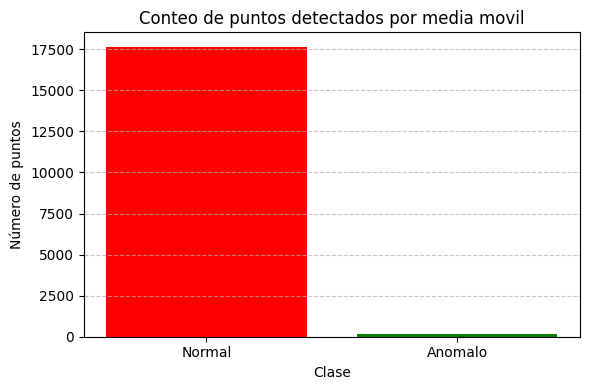

In [ ]:
a = df_movil['is_anomaly'].value_counts()

a.index = ['Normal', 'Anomalo']


#Creacion del gráfico
plt.figure(figsize=(6, 4))
plt.bar(a.index, a, color=['red', 'green'])
plt.title('Conteo de puntos detectados por media movil')
plt.ylabel('Número de puntos')
plt.xlabel('Clase')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Z-Score

In [ ]:
# Vamos a aplicar la técnica de detección de anomalías Z-Score
from scipy import stats

df_zscore = df.copy()

mean = np.mean(df_zscore[features])
std_dev = np.std(df_zscore[features])

z_scores = np.abs(stats.zscore(df_zscore[features]))
print(z_scores)

[[0.4072366  0.45772059 0.60278725 ... 9.79033327 9.64845244 2.09427699]
 [0.4819331  0.54051284 0.68421557 ... 9.79033327 9.64845244 2.09427699]
 [0.54595867 0.592258   0.75401127 ... 9.79033327 9.64845244 2.09427699]
 ...
 [0.71669354 0.57155994 0.71911342 ... 0.31135553 0.35537559 0.75393161]
 [0.70602261 0.5612109  0.66095033 ... 0.29471746 0.34837501 1.22863304]
 [0.78071912 0.63365412 0.75401127 ... 0.32086301 0.38571143 1.32505677]]


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
# Define un umbral para detectar anomalías (por ejemplo, 3 desviaciones estándar)
threshold = 3
df_zscore['anomaly'] = (z_scores > threshold).any(axis=1)
print(df_zscore['anomaly'].value_counts())

anomaly
False    17318
True       466
Name: count, dtype: int64


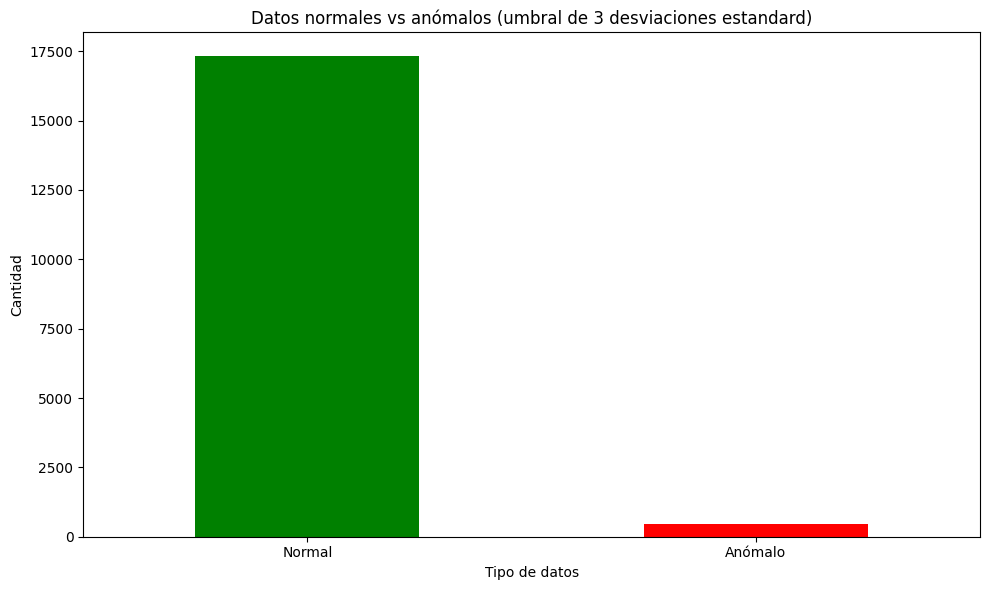

In [ ]:
# Visualiza los resultados
counts = df_zscore['anomaly'].value_counts()
counts.index = ['Normal', 'Anómalo']

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color=['green', 'red'])
plt.title("Datos normales vs anómalos (umbral de 3 desviaciones estandard)")
plt.ylabel("Cantidad")
plt.xlabel("Tipo de datos")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Isolation Forest

In [ ]:
# Vamos a aplicar la técnica de detección de anomalías de Isolation Forest, configura el parámetro contamination en 5%
from sklearn.ensemble import IsolationForest

df_isolation_1 = df.copy()
model_Isolation_1 = IsolationForest(contamination=0.05)
model_Isolation_1.fit(df_isolation_1[features])

IsolationForest(contamination=0.05)

In [ ]:
# Agrega las columnas de puntaje y si es dato anómalo o no en el dataframe
df_isolation_1['anomaly_score'] = model_Isolation_1.decision_function(df_isolation_1[features])
df_isolation_1['anomaly'] = model_Isolation_1.predict(df_isolation_1[features])
df_isolation_1['anomaly'] = df_isolation_1['anomaly'].map({1: False, -1: True})

print(df_isolation_1)

          DeviceTimeStamp    VL1    VL2    VL3   IL1   IL2   IL3   VL12   VL23   VL31  INUT  anomaly_score  anomaly
1330  2019-07-01 12:32:00  244.9  244.9  245.0   0.4   0.0   0.0    0.0    0.0    0.0   0.4      -0.213711     True
1331  2019-07-01 12:47:00  245.6  245.7  245.7   0.4   0.0   0.0    0.0    0.0    0.0   0.4      -0.216437     True
1332  2019-07-01 12:48:00  246.2  246.2  246.3   0.4   0.0   0.0    0.0    0.0    0.0   0.4      -0.213854     True
1469  2019-07-04 17:14:00  246.1  246.1  246.2   0.2   0.0   0.0    0.0    0.0    0.0   0.2      -0.215403     True
1470  2019-07-04 17:15:00  246.8  246.9  246.9   0.2   0.0   0.0    0.0    0.0    0.0   0.2      -0.210608     True
...                   ...    ...    ...    ...   ...   ...   ...    ...    ...    ...   ...            ...      ...
19347 2020-04-13 23:30:00  246.4  244.7  244.3  79.0  45.4  86.6  426.0  422.3  426.1  38.0       0.164757    False
19348 2020-04-13 23:45:00  246.8  245.1  244.8  77.0  42.0  84.2  426.8 

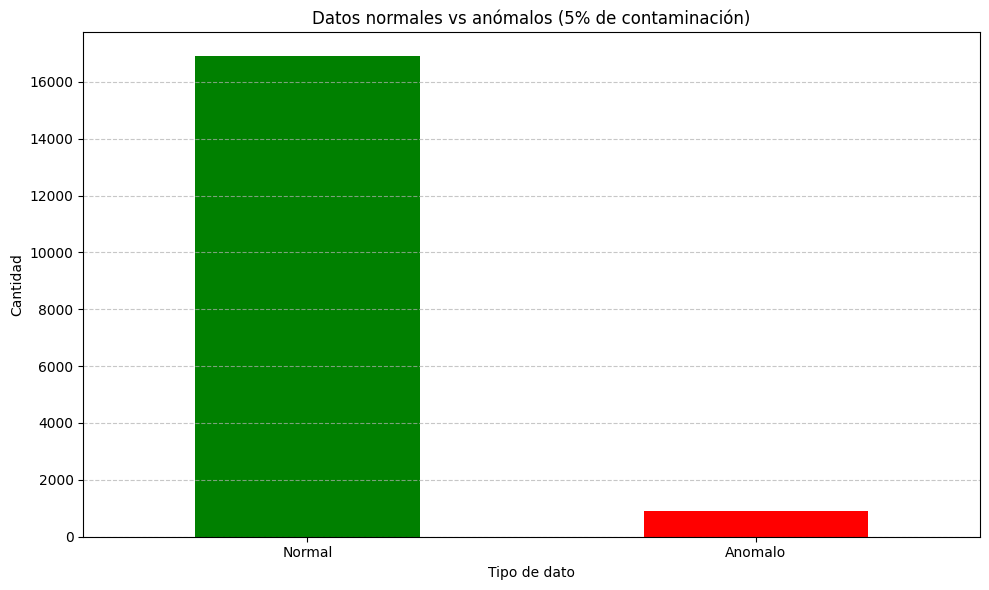

Numero de predicciones normales: 16894
Numero de predicciones anomalas: 890


In [ ]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales
anomaly_count = df_isolation_1['anomaly'].value_counts().sort_index()
anomaly_count.index = ['Normal', 'Anomalo']

plt.figure(figsize=(10, 6))
anomaly_count.plot(kind='bar', color=['green', 'red'])
plt.title("Datos normales vs anómalos (5% de contaminación)")
plt.xlabel("Tipo de dato")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Numero de predicciones normales:",np.sum(df_isolation_1['anomaly'] == False))
print("Numero de predicciones anomalas:",np.sum(df_isolation_1['anomaly'] == True))

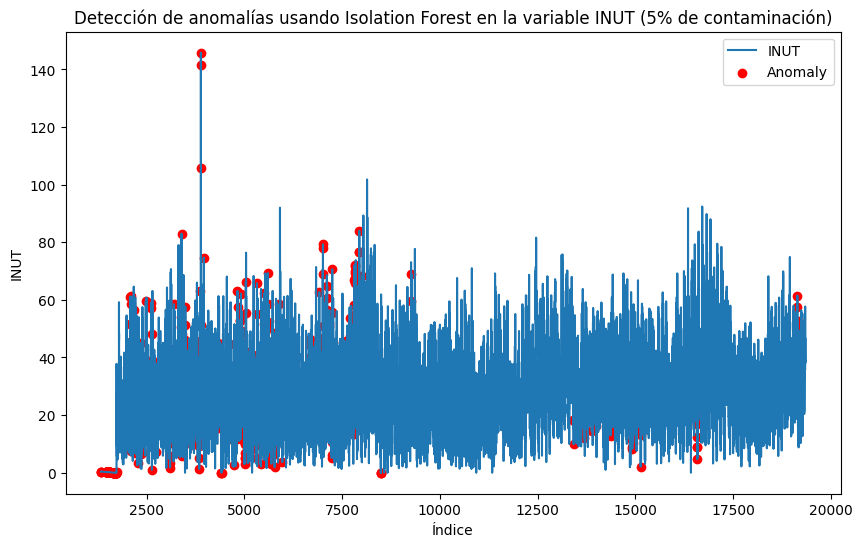

In [ ]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.
plt.figure(figsize=(10, 6))
plt.plot(df_isolation_1['INUT'], label='INUT')
plt.scatter(df_isolation_1[df_isolation_1['anomaly']].index, df_isolation_1[df_isolation_1['anomaly']]['INUT'], color='red', label='Anomaly')
plt.title("Detección de anomalías usando Isolation Forest en la variable INUT (5% de contaminación)")
plt.xlabel('Índice')
plt.ylabel('INUT')
plt.legend()
plt.show()

In [ ]:
# Repite los pasos anteriores con el parámetro de contamination en 1%

In [ ]:
df_isolation_2 = df.copy()
model_Isolation_2 = IsolationForest(contamination=0.01)
model_Isolation_2.fit(df_isolation_2[features])

IsolationForest(contamination=0.01)

In [ ]:
# Agrega las columnas de puntaje y si es dato anómalo o no en el dataframe
df_isolation_2['anomaly_score'] = model_Isolation_2.decision_function(df_isolation_2[features])
df_isolation_2['anomaly'] = model_Isolation_2.predict(df_isolation_2[features])
df_isolation_2['anomaly'] = df_isolation_2['anomaly'].map({1: False, -1: True})

print(df_isolation_2)

          DeviceTimeStamp    VL1    VL2    VL3   IL1   IL2   IL3   VL12   VL23   VL31  INUT  anomaly_score  anomaly
1330  2019-07-01 12:32:00  244.9  244.9  245.0   0.4   0.0   0.0    0.0    0.0    0.0   0.4      -0.030455     True
1331  2019-07-01 12:47:00  245.6  245.7  245.7   0.4   0.0   0.0    0.0    0.0    0.0   0.4      -0.029951     True
1332  2019-07-01 12:48:00  246.2  246.2  246.3   0.4   0.0   0.0    0.0    0.0    0.0   0.4      -0.029951     True
1469  2019-07-04 17:14:00  246.1  246.1  246.2   0.2   0.0   0.0    0.0    0.0    0.0   0.2      -0.030307     True
1470  2019-07-04 17:15:00  246.8  246.9  246.9   0.2   0.0   0.0    0.0    0.0    0.0   0.2      -0.029968     True
...                   ...    ...    ...    ...   ...   ...   ...    ...    ...    ...   ...            ...      ...
19347 2020-04-13 23:30:00  246.4  244.7  244.3  79.0  45.4  86.6  426.0  422.3  426.1  38.0       0.315385    False
19348 2020-04-13 23:45:00  246.8  245.1  244.8  77.0  42.0  84.2  426.8 

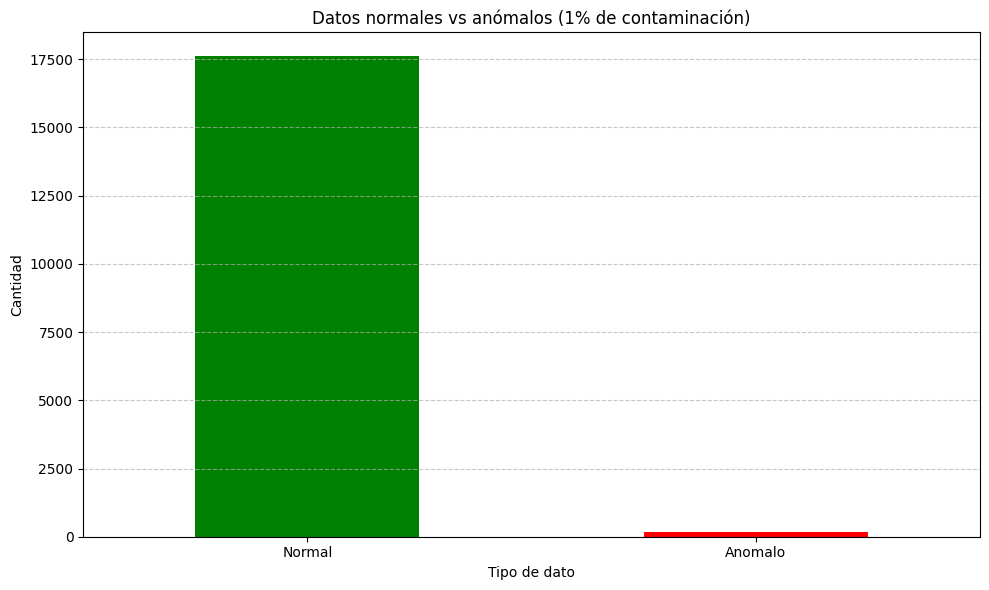

Numero de predicciones normales: 17606
Numero de predicciones anomalas: 178


In [ ]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales
anomaly_count = df_isolation_2['anomaly'].value_counts().sort_index()
anomaly_count.index = ['Normal', 'Anomalo']

plt.figure(figsize=(10, 6))
anomaly_count.plot(kind='bar', color=['green', 'red'])
plt.title("Datos normales vs anómalos (1% de contaminación)")
plt.xlabel("Tipo de dato")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Numero de predicciones normales:",np.sum(df_isolation_2['anomaly'] == False))
print("Numero de predicciones anomalas:",np.sum(df_isolation_2['anomaly'] == True))

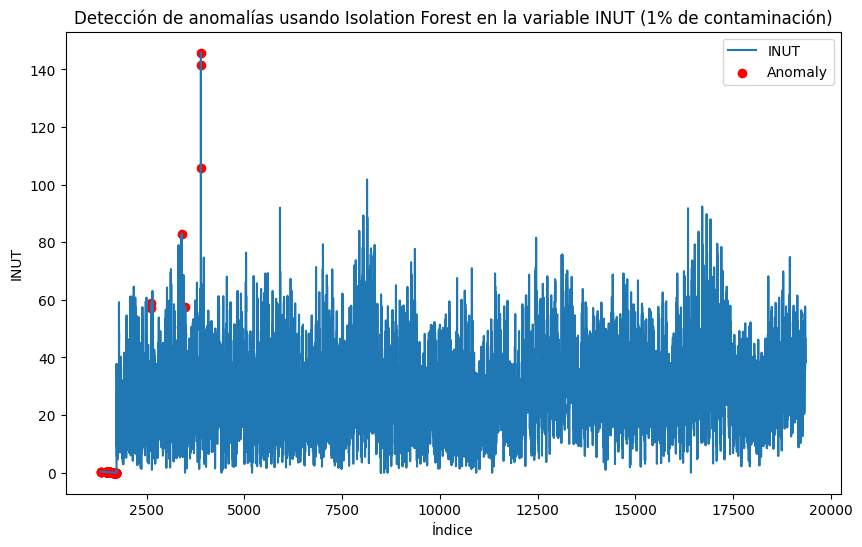

In [ ]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.
plt.figure(figsize=(10, 6))
plt.plot(df_isolation_2['INUT'], label='INUT')
plt.scatter(df_isolation_2[df_isolation_2['anomaly']].index, df_isolation_2[df_isolation_2['anomaly']]['INUT'], color='red', label='Anomaly')
plt.title("Detección de anomalías usando Isolation Forest en la variable INUT (1% de contaminación)")
plt.xlabel('Índice')
plt.ylabel('INUT')
plt.legend()
plt.show()

## Local Outlier Factor

In [ ]:
# Vamos a aplicar la técnica de detección de anomalías de Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

# Eliminamos el tiempo ya que nuestro modelo no puede trabajar con él
df_no_time = df.drop(columns=['DeviceTimeStamp'])

# Creamos el modelo
clf = LocalOutlierFactor(n_neighbors=3)

# Entrenamos y devolvemos predicciones. Valor de 1 es normal y valor de 0 representa anomalía
prediccion = clf.fit_predict(df_no_time)
prediccion_prob = clf.negative_outlier_factor_

print("Numero de predicciones normales:",np.sum(prediccion == 1))
print("Numero de predicciones anomalas:",np.sum(prediccion == -1))

Numero de predicciones normales: 17502
Numero de predicciones anomalas: 282


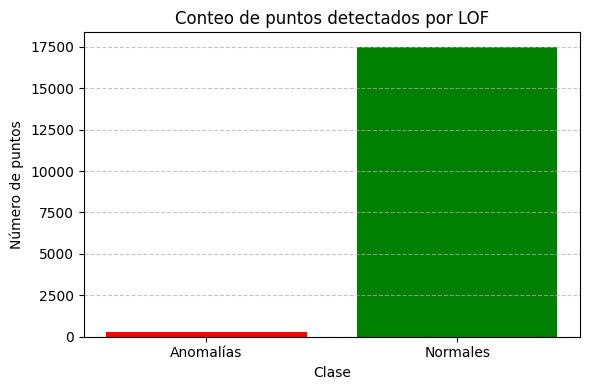

In [ ]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales

#Contamos cuantas ocurrencias hay
unicos, conteos = np.unique(prediccion, return_counts=True)

etiquetas = ['Anomalías' if u == -1 else 'Normales' for u in unicos]

#Creacion del gráfico
plt.figure(figsize=(6, 4))
plt.bar(etiquetas, conteos, color=['red', 'green'])
plt.title('Conteo de puntos detectados por LOF')
plt.ylabel('Número de puntos')
plt.xlabel('Clase')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

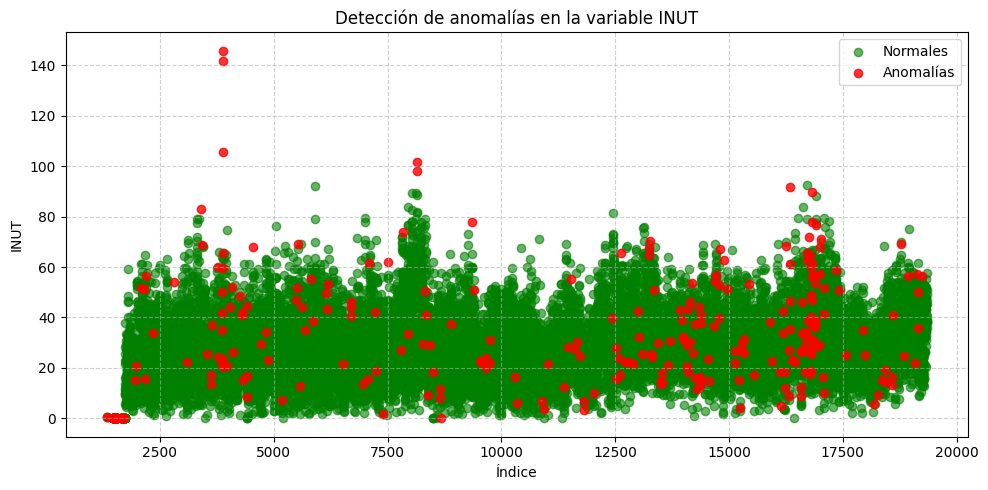

In [ ]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.
df['LOF_pred'] = prediccion

# Crear máscara para anomalías y normales
anomalias = df[df['LOF_pred'] == -1]
normales = df[df['LOF_pred'] == 1]

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.scatter(normales.index, normales['INUT'], c='green', label='Normales', alpha=0.6)
plt.scatter(anomalias.index, anomalias['INUT'], c='red', label='Anomalías', alpha=0.8)

plt.title('Detección de anomalías en la variable INUT')
plt.xlabel('Índice')
plt.ylabel('INUT')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Análisis

In [ ]:
# Realiza un análisis detallado de los resultados obtenidos en cada una de las técnicas aplicadas. Utiliza gráficos o trablas para apoyar tu conclusiones

Pasaremos a describir los resultados obtenidos para cada uno de los métodos de detección de anomalías:

- Media Movil: este procedimento matemático a diferencia de de los demás métodos no es un modelo de machine learning, lo que implica una serie de limitaciones. Primero al no ser un modelo no puede ser entrenado, lo que implica que en cada ejecución este algoritmo realizará la detección de anomalías siempre desde 0. Esto es una gran desventaja a diferencia de otros métodos que si implementan algoritmos de machine learning, ya que con estos somo capaces de aprender las características fundamentales de los datos a detectar y podemos utilizar este modelo para predecir datos futuros. Por otro lado, debido a su naturaleza de basarse en el uso de unicamente media y desvicación tipica aplicada a una cierta ventana, este método es el que menor rendimiento tiene frente a los demas. Con él obtenemos 137 anomalías.

- Z-Score: es una prueba paramétrica que nos permite detectar anomalías usando la media y la desviación estándard de todos los datos. Se usa la formula siguiente en cada dato z = (valor a analizar - media) / desviación estandar. Y una vez hecho esto se define un umbral de desviaciones estandar a partir del cual se considera el punto una anomalía. Esta técnica nos da un resultado de 466 anomalías, lo cual es un poco superior a las anomalías que creemos que son reales pero es senzilla de ejecutar y nos da una aproxiamación. Una de las principales limitaciones es que al basarse en el uso de la media y desviación típica es bastante sensible a outliers, implicando que estos puedan contaminar el resto de predicciones.

- Isolation Forest: este método es un algoritmo de aprendizaje automático no supervisado y está basado en árboles de decisión. Para usarlo creamos múltiples árboles de aislamiento y seleccionamos características aleatoriamente y valores de corte para particionar el espacio. Repetimos esto hasta que todos los datos estén aislados o lleguemos a la profundidad máxima de los árboles y se hace una suma promedia de la profundidad a la que se encuentran los nodos. Como más superficial es un nodo (más fácil de separar) más probable es que sea una anomalía. Como hemos visto con el parametro de conatminación a 5% obtenemos 890 anomalías, y si lo cambiamos a 1% obtenemos 178. Como vemos en los gráficos es bastante más plausible el número que obtenemos con el 1% y se asemeja a resultados de otros métodos.

- Local Outlier Factor: este algoritmo calcula la densidad de la region alrededor de los puntos para compararla entre estos y ver si en algun punto hay mucha diferencia. La densidad se mide calculando la inversa de la distancia del k-vecino más cercano. Esta se compara con sus vecinos y si la diferencia es muy significativa el algoritmo lo asignará como anomalía. En nuestra ejecución creemos que funciona suficientemente bien ya que detecta 282 anomalías pero en la gráfica de los valores de INUT vemos que hay puntos que a priori por solo esta variable no diríamos que son anomalías.

- Comparación
Después de la limpieza del dataset, obtenemos un conjunto de datos con 17784 instancias. Habiendo probado estos cuatro métodos diferentes vemos que obtenemos unos resultados que nos señalan que el número de anomalías debería situarse entre 100 y 800. Como la mayoría se acercan al rango de las 200 y en los gráficos de la variable INUT vemos que este número sería el que tendría más sentido. Así podemos ver que los modelos que mejor han funcionado para este caso son el Isolation Forest (1% contaminación), la media móvil y el Local Outlier Factor.

## Artículos de investigación

#### Artículo 1

[Anomaly Detection with Machine Learning Algorithms and Big Data in Electricity Consumption (Sustainability, 2021).](https://www.researchgate.net/publication/355203576_Anomaly_Detection_with_Machine_Learning_Algorithms_and_Big_Data_in_Electricity_Consumption)

**Objetivo**

El objetivo principal de esta investigación es detectar comportamientos anómalos en el consumo eléctrico que puedan estar relacionados con fraudes o errores de medición. El estudio se enfoca en aplicar un enfoque híbrido que combina técnicas no supervisadas para identificar anomalías en series temporales de consumo eléctrico con modelos de aprendizaje supervisado para clasificar dichas anomalías como casos de fraude o no fraude.

**Técnicas empleadas**

El proceso propuesto consta de dos fases:

- Fase no supervisada: se aplican dos métodos para detectar patrones anómalos en los datos de consumo eléctrico:

  - SR-CNN (Spectral Residual - Convolutional Neural Network): aunque tiene un nombre relacionado con redes neuronales, en este caso se utiliza solo la parte del análisis espectral sin entrenamiento profundo.

  - Modelo de martingalas: detecta cambios bruscos en la secuencia de consumo mediante un análisis estadístico probabilístico.

- Fase supervisada: se construye un modelo de clasificación binaria usando:

  - Two-Class Boosted Decision Tree, un modelo clásico de aprendizaje automático.

  - Se aplica también selección de características basada en análisis discriminante lineal de Fisher (LDA) para mejorar el rendimiento del clasificador.

**Resultados principales**

Se establece un umbral del 15% de puntos anómalos en una serie temporal para considerar que un medidor presenta comportamiento sospechoso.

El modelo supervisado logra una exactitud del 90%, con una precisión del 87,5% y un valor F1 de 0,894, lo que indica una alta capacidad para detectar correctamente casos de fraude.

La solución fue implementada como un servicio web en un entorno de producción, permitiendo evaluar nuevos medidores con una probabilidad estimada de fraude, que en promedio fue de 0,79 para los casos sospechosos.

Además, la metodología propuesta permite escalar el análisis a grandes volúmenes de datos, lo cual es clave para su uso en sistemas reales de distribución eléctrica.

#### Artículo 2

[Anomaly detection in IIoT: a case study using machine learning (2018)](https://dl.acm.org/doi/10.1145/3152494.3156816?utm_source=chatgpt.com)

**Objetivo**

El objetivo de esta investigación es aplicar técnicas de detección de anomalías en el contexto del Internet Industrial de las Cosas (IIoT), específicamente para identificar fallos o comportamientos anómalos en equipos industriales que operan con motores y sensores. La finalidad es facilitar el mantenimiento predictivo y evitar tiempos de inactividad no planificados en entornos de producción.

**Técnicas empleadas**

El estudio utiliza diferentes algoritmos de aprendizaje automático tradicionales, tanto supervisados como no supervisados.
- Supervisados: Support Vector Machines (SVM), árboles de decisión y Random Forest.
- No supervisados: métodos de clustering como k-means. Se realiza una extracción de características a partir de señales de sensores (como vibración, temperatura, corriente, etc.), que luego se usan para entrenar los modelos.

**Resultados principales**

Los resultados muestran que las técnicas supervisadas, especialmente Random Forest y SVM, alcanzan altas tasas de precisión en la detección de fallos. Por otro lado, los métodos no supervisados ofrecen una solución viable cuando no se dispone de etiquetas, aunque con un rendimiento algo menor. La investigación concluye que el uso de algoritmos de aprendizaje automático tradicionales, sin recurrir a deep learning, puede ser efectivo y eficiente para la detección de anomalías en entornos industriales reales.